In [36]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import requests
import os
import matplotlib.dates as mdates
from datetime import datetime


In [37]:
tabulador = pd.read_excel("../datos/tabulador_pe2019.xls", header = 9)

tabulador['TIPO'].unique()

clima = pd.read_csv("../Semana2/TEMPERATURAS_LLUVIAS.csv")

file = 'salarios_minimos.csv'
if not os.path.isfile(file):
    url = 'https://idconline.mx/laboral/salarios-minimos/salarios-minimos-1986-2007'
    html = requests.get(url).content
    salarios_list = pd.read_html(html, header = 1)
    salarios = salarios_list[-1]
    salarios.to_csv('salarios_minimos.csv')
else:
    salarios = pd.read_csv(file)


In [38]:
tabulador.head()

,NIVEL,TIPO,PUESTO,SUELDO BASE,CUOTAS SEGURIDAD SOCIAL,PREVISIÓN SOCIAL,AYUDA X SERVICIOS,APOYO FAMILIAR,GRATIFICACIÓN QUINCENAL,SUELDO MENSUAL BRUTO,IMPTO MENSUAL,ISSEG,ISSSTE,SUELDO MENSUAL NETO,PRIMA VACACIONAL,AGUINALDO
0,22,NaN,GOBERNADOR/A DEL ESTADO,59804.327930,5843.07,1913.1,25897,64294.837780,75373.99,233126.325711,69584.321342,5082.66,760.41,157698.934369,10 Días por Año,45 Días por Año
1,20,NaN,SECRETARIO/A DE ESTADO A,49025.945517,5843.07,1913.1,22783,48858.839699,67187.62,195611.575216,56829.306173,5082.66,760.41,132939.199042,10 Días por Año,45 Días por Año
2,19,NaN,DIRECTOR/A GENERAL PARAESTATAL A,40685.951590,5843.07,1913.1,18805,41397.705456,49230.82,157875.647046,43999.090596,5082.66,760.41,108033.486450,10 Días por Año,45 Días por Año
3,19,NaN,SECRETARIO/A DE ESTADO B,40685.951590,5843.07,1913.1,18805,41397.705456,49230.82,157875.647046,43999.090596,5082.66,760.41,108033.486450,10 Días por Año,45 Días por Año
4,18,NaN,SECRETARIO/A DE ESTADO C,37083.708634,5843.07,1913.1,16756,35924.238404,42651.90,140172.017038,37979.856393,5082.66,760.41,96349.090645,10 Días por Año,45 Días por Año


In [39]:
clima.head()

,Estado,Localidad,Edo,Clave,Lon,Lat,2018,2019,2020,Tmax,Tmin,Tmed
0,AGS,"Aguascalientes, Ags.",AGS,AGSAG,-102.31,21.90,25.8,148.5,25.8,23.467742,6.403226,14.935484
1,AGS,"Calvillo, Ags. SMN*",AGS,CALVILLO,-102.71,21.85,56.0,18.3,56.0,26.522581,3.874194,15.198387
2,AGS,"El Niagara, Ags.",AGS,NGRAG,-102.37,21.78,25.4,173.3,25.4,24.306452,3.741935,14.024194
3,AGS,"La Codorniz, Ags.",AGS,CDRAG,-102.68,22.00,50.0,139.0,50.0,24.516129,7.112903,15.814516
4,AGS,"Los Conos, Ags.",AGS,CNSAG,-102.00,21.90,51.5,100.4,51.5,23.419355,3.790323,13.604839


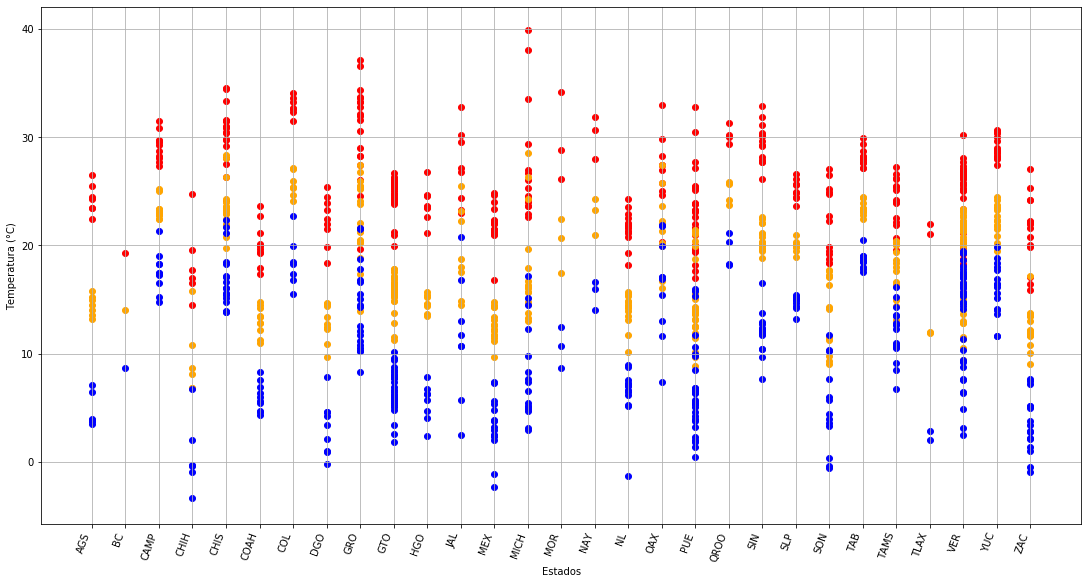

In [52]:
fig, ax = plt.subplots(figsize=(15, 8), constrained_layout=True)

ax.scatter(clima.Edo, clima.Tmax, color = "Red")
#ax.plot(clima.Edo, np.mean(clima.Tmax))
ax.scatter(clima.Edo, clima.Tmed, color = "Orange")
ax.scatter(clima.Edo, clima.Tmin, color = "Blue")
ax.set_ylabel("Temperatura (°C)")
ax.set_xlabel("Estados")
ax.grid()
plt.setp(ax.get_xticklabels(), rotation=70, ha="right")
plt.show()

In [176]:
salarios = salarios.sort_values(by = "i", ascending = False)
salarios.head()

,i,Fecha de publicación el DOF,Vigente a partir de:,ZLFN1,Resto del país,A,B,C
44,44,29 de febrero 1988,1o. marzo 1988,NaN,NaN,8000.0,7405.0,6670.0
43,43,14 de diciembre 1988,1o. enero 1989,NaN,NaN,8640.0,7995.0,7205.0
42,42,26 de junio de 1989,1o. julio 1989,NaN,NaN,9160.0,8475.0,7640.0
41,41,4 de diciembre 1989,4 de diciembre 1989,NaN,NaN,10080.0,9325.0,8405.0
40,40,4 de diciembre 1989,1o. enero 1990,NaN,NaN,10080.0,9325.0,8405.0


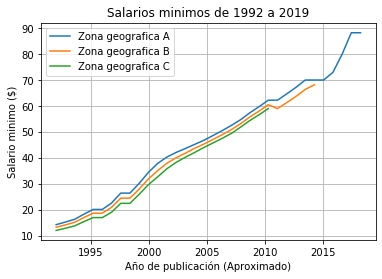

In [175]:
A = salarios.A[9:44]
B = salarios.B[9:44]
C = salarios.C[9:44]
x = np.linspace(1992, 2019, 35)

ax = plt.gca()
plt.plot(x, A, label= "Zona geografica A")
plt.plot(x, B, label= "Zona geografica B")
plt.plot(x, C, label= "Zona geografica C")
plt.ylabel("Salario minimo ($)")
plt.xlabel("Año de publicación (Aproximado)")
plt.title("Salarios minimos de 1992 a 2019")
plt.grid()
plt.legend()